In [1]:
%matplotlib inline
import sys
sys.path.append('../')
import vishn as vn
# Other packages that will be used in this demo, in general not necessary to use HostSim
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
def getPopulationLevel(result, j, T, spd):
    """
    Helper function that creates a vector of the population level of the jth column of the state array
    result (networkx.Graph): the output graph of the simulation
    j (int): index of state array column to aggregate across
    T (int): simulation duration
    spd (int): samples per day
    
    returns: pop_tot (numpy.array([spd*T,])) population level of jth compartment through time
    """
    pop_tot = np.zeros((T*spd,))
    for i in result.nodes:
        node_lvl = result.nodes[i]["state"][:,j]
        pop_tot += node_lvl
    return pop_tot

def population_vload_plot(result, T, spd, color, savefile_as, alpha=1, xlim=None, title=None):
    """
    Creates a plot of the population viral load through time
    
    result (networkx.Graph): the output graph of the simulation
    j (int): index of state array column to aggregate across
    T (int): simulation duration
    spd (int): samples per day
    alpha (float): the alpha level for all curves
    xlim (int): the highest time value plotted the x axis
    
    returns: None
    """
    vload_tot = getPopulationLevel(result, 2, T, spd)
    plt.style.use('default')
    time = np.linspace(0,T,T*spd)
    plt.figure(figsize=(2.5,2.5))
    plt.plot(time, vload_tot, color=color, alpha = alpha)
    #plt.ylabel("Viral Load")
    #plt.xlabel("Days")
    if title!= None:
        plt.title(title)
    ax =  plt.gca()
    ax.set_xlim([0,xlim])
    plt.savefig(savefile_as)
    plt.show()
    return 

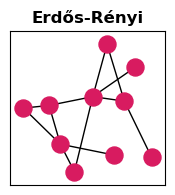

In [146]:
# For paper:
# Set these as parameter values for all hosts
param_dict = {"delta":0.8,"p":4.5e2,"c":5e-2,"beta":2e-5,"d":0.05,
              "dX":1e-4,"r":0.01,"alpha":1.2,"N":6e4}
singlerow = pd.DataFrame(param_dict, index=[0])

# seed 9 gets us a fully connected graph
erdos_renyi = nx.erdos_renyi_graph(10, 0.2, seed=9)
# Put weight of 0.1 on all edges
for edge in erdos_renyi.edges():
    erdos_renyi[edge[0]][edge[1]]['weight'] = 0.1
    
plt.figure(3,figsize=(2,2))
plt.style.use('default')
nx.draw_networkx(erdos_renyi,pos=nx.spring_layout(erdos_renyi), node_color = "#D81B60", node_size=150, font_size =11,with_labels = False)
plt.title("Erdős-Rényi", weight="bold")
plt.savefig("erdos_renyi_graph.png")
plt.show()

nx.write_edgelist(erdos_renyi, "erdos_graph.edgelist")

# see section 1.3 for values of singlerow
node_10 = pd.concat([singlerow]*10, ignore_index=True)
node_10.to_csv("node_10.csv", index=False)  

In [90]:
#generate hetero sub-host parameters:
np.random.seed(0)
paramdata = pd.DataFrame()
paramdata["id"] = pd.Series(range(0,10))
for param in param_dict.keys():
    if param != "N":
        paramdata[param] = np.random.normal(param_dict[param], 
                                            0.2*param_dict[param], 
                                            10)
    else:
        paramdata[param] = [param_dict[param]]*10
paramdata.to_csv("node_10hetero.csv", index=False)

In [97]:
erdosHomo_result = hs.simulate("erdos_homo.txt")
erdosHetero_result = hs.simulate("erdos_hetero.txt")

{'NetworkFile': 'erdos_graph.edgelist', 'NumInitialInfected': '1', 'InitInfectedNodes': '[5]', 'InfectionMethod': 'Individual', 'Center': '1700000', 'Steepness': '-3/1700000', 'InitialExposure': '1e5', 'Equation': 'tive', 'InfectiveIndex': '2', 'ParameterData': 'node_10.csv', 'TargetInit': '[60000,0,0,0]', 'InfectedInit': '[60000,1,1/6000,0]', 'Duration': '100', 'SamplesPerDay': '6', 'Seed': '0'}
{'NetworkFile': 'erdos_graph.edgelist', 'NumInitialInfected': '1', 'InitInfectedNodes': '[5]', 'InfectionMethod': 'Individual', 'Center': '1700000', 'Steepness': '-3/1700000', 'InitialExposure': '1e5', 'Equation': 'tive', 'InfectiveIndex': '2', 'ParameterData': 'node_10hetero.csv', 'TargetInit': '[60000,0,0,0]', 'InfectedInit': '[60000,1,1/6000,0]', 'Duration': '100', 'SamplesPerDay': '6', 'Seed': '0'}


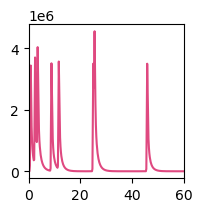

In [120]:
population_vload_plot(erdosHomo_result, 100, 6, "#D81B60", "erdosHomo.png", alpha=0.8, xlim=60)

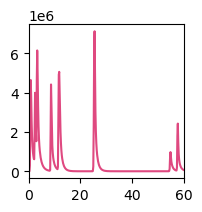

In [140]:
population_vload_plot(erdosHetero_result, 100, 6, "#D81B60", "erdosHetero.png",alpha=0.8, xlim=60)

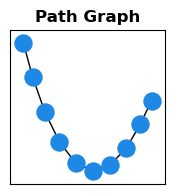

In [145]:
# Creating path graph
path_graph = nx.path_graph(10)
# Put weight of 0.1 on all edges
for edge in path_graph.edges():
    path_graph[edge[0]][edge[1]]['weight'] = 1
    
# Draw the graph
plt.figure(3,figsize=(2,2)) 
plt.style.use('default')
nx.draw_networkx(path_graph, node_color="#1E88E5", node_size=150, font_size =11, with_labels = False)
plt.title("Path Graph", weight="bold")
plt.savefig("path_graph.png")
plt.show()

nx.write_edgelist(path_graph, "path10.edgelist")

In [55]:
path_result = hs.simulate("path10.txt")

{'NetworkFile': 'path10.edgelist', 'NumInitialInfected': '1', 'InitInfectedNodes': '[0]', 'InfectionMethod': 'Individual', 'Center': '1700000', 'Steepness': '-3/1700000', 'InitialExposure': '1e5', 'Equation': 'tive', 'InfectiveIndex': '2', 'ParameterData': 'node_10.csv', 'TargetInit': '[60000,0,0,0]', 'InfectedInit': '[60000,1,1/6000,0]', 'Duration': '100', 'SamplesPerDay': '6', 'Seed': '777'}


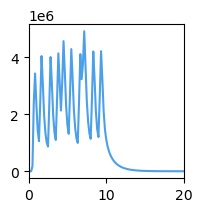

In [133]:
population_vload_plot(path_result, 100, 6, "#1E88E5", "path10.png", alpha=0.8, xlim=20)

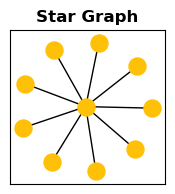

In [142]:
# Creating star graph
star_graph = nx.star_graph(9)
# Put weight of 0.1 on all edges
for edge in star_graph.edges():
    star_graph[edge[0]][edge[1]]['weight'] = 1
    
# Draw the graph
plt.figure(3,figsize=(2,2)) 
plt.style.use('default')
nx.draw_networkx(star_graph, node_color="#FFC107", node_size=150, font_size =11, with_labels = False)
plt.title("Star Graph", weight="bold")
plt.savefig("star_graph.png")
plt.show()

nx.write_edgelist(star_graph, "star.edgelist")

In [64]:
star_result = hs.simulate("star.txt")

{'NetworkFile': 'star.edgelist', 'NumInitialInfected': '1', 'InitInfectedNodes': '[0]', 'InfectionMethod': 'Individual', 'Center': '1700000', 'Steepness': '-3/1700000', 'InitialExposure': '1e5', 'Equation': 'tive', 'InfectiveIndex': '2', 'ParameterData': 'node_10.csv', 'TargetInit': '[60000,0,0,0]', 'InfectedInit': '[60000,1,1/6000,0]', 'Duration': '100', 'SamplesPerDay': '6', 'Seed': '333'}


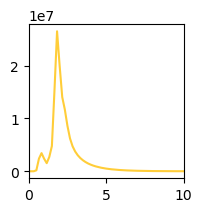

In [136]:
population_vload_plot(star_result, 100, 6, "#FFC107", "star.png",alpha=0.8, xlim=10)

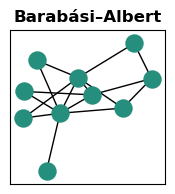

In [141]:
# barabasi-albert graph
BA = nx.barabasi_albert_graph(10, 2, seed=0)
# Put weight of 0.1 on all edges
for edge in BA.edges():
    BA[edge[0]][edge[1]]['weight'] = 0.1


# Draw the graph
plt.figure(3,figsize=(2,2)) 
plt.style.use('default')
nx.draw_networkx(BA, node_color="#258E7C", node_size=150, font_size =11, with_labels = False)
plt.title("Barabási–Albert", weight="bold")
plt.savefig("BA10.png")
plt.show()

nx.write_edgelist(BA, "BA10.edgelist")

In [84]:
BA_result = hs.simulate("BA10.txt")

{'NetworkFile': 'BA10.edgelist', 'NumInitialInfected': '1', 'InitInfectedNodes': '[5]', 'InfectionMethod': 'Individual', 'Center': '1700000', 'Steepness': '-3/1700000', 'InitialExposure': '1e5', 'Equation': 'tive', 'InfectiveIndex': '2', 'ParameterData': 'node_10.csv', 'TargetInit': '[60000,0,0,0]', 'InfectedInit': '[60000,1,1/6000,0]', 'Duration': '100', 'SamplesPerDay': '6', 'Seed': '333'}


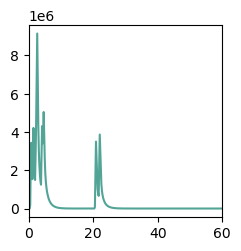

In [148]:
population_vload_plot(BA_result, 100, 6, "#258E7C", "BA.png",alpha=0.8, xlim=60)